# Assignment 2

In [4]:
import numpy as np

### Extra Task
Implement matrix multiplication of two matrices

In [5]:
def matrix_multiplication(a, b):
    is_numerical_a = all(all((type(ele_a) != str) for ele_a in row_a) for row_a in a)
    is_numerical_b = all(all((type(ele_b) != str) for ele_b in row_b) for row_b in b)
    has_all_rows_same_lenght_a = all(len(row_a) == len(a[0]) for row_a in a)
    has_all_rows_same_lenght_b = all(len(row_b) == len(b[0]) for row_b in b)
    can_multiple = len(a[0]) == len(b)
    if is_numerical_a and is_numerical_b and has_all_rows_same_lenght_a and has_all_rows_same_lenght_b and can_multiple :
        return [[sum(ele_a*ele_b for ele_a, ele_b in zip(row_a, col_b)) for col_b in zip(*b)] for row_a in a]
    else :
        print ("Please make sure you have valid matrices")
a = [[1,2],
    [2, 0]]
b = [[1,1,0],
    [2,1,3]]
matrix_multiplication(a, b)

[[5, 3, 6], [2, 2, 0]]

### Extra Task
Implement Hadamard product of two matrices

In [6]:
def matrix_to_list(data_matrix):
    data_list = []
    [[data_list.append(element) for element in row] for row in data_matrix]
    return data_list

In [7]:
def list_to_matrix(row_count, col_count, data_list):
    data_matrix = []
    for i in range(row_count):
        row_list = []
        for j in range(col_count):
            row_list.append(data_list[row_count * i + j])
        data_matrix.append(row_list)
    return data_matrix

In [8]:
def vector_hadamard(vector1 , vector2):
    if len(vector1) == len(vector2) :
        if all(isinstance(x, (int, float, complex )) for x in vector1) and all(isinstance(x, (int, float, complex )) for x in vector2):
            result = np.arange(len(vector1))
            for index in range(0, len(vector1)):
                result[index] = vector1[index] * vector2[index]
            return result
        else :
            print("There is a problem with elements types, the type of elements must be numeric.")
    else :
        print("There is a problem with vectors lenghts, the lenght of vectors must be equal.")

In [9]:
def matrix_hadamard(a, b):
    is_numerical_a = all(all((type(ele_a) != str) for ele_a in row_a) for row_a in a)
    is_numerical_b = all(all((type(ele_b) != str) for ele_b in row_b) for row_b in b)
    has_all_rows_same_lenght_a = all(len(row_a) == len(a[0]) for row_a in a)
    has_all_rows_same_lenght_b = all(len(row_b) == len(b[0]) for row_b in b)
    can_multiple = (len(a[0]) == len(b[0]) and len(a) == len(b))
    if is_numerical_a and is_numerical_b and has_all_rows_same_lenght_a and has_all_rows_same_lenght_b and can_multiple :
        a_list = matrix_to_list(a)
        b_list = matrix_to_list(b)
        result = vector_hadamard(a_list, b_list)
        return list_to_matrix(len(a), len(a[0]), result)
    else :
        print ("Please make sure you have valid matrices")
a = [[3,4],
    [3, 3]]
b = [[2,2],
    [2,2]]
matrix_hadamard(a, b)

[[6, 8], [6, 6]]

### Data 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

import warnings
warnings.filterwarnings('ignore')

#### Please use HW_gender data from Assignment 1. Use the weight to predict the height of a person. You can try different variants: per gender or for overall data. Please argue why did you prefer one variant over another in the report. 

In [11]:
data = pd.read_csv('HW_gender.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Weight    10000 non-null float64
Height    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [12]:
data['Gender_Categorical'] = data.Gender.map({'Female':0, 'Male':1})
data.head(3)

,Gender,Weight,Height,Gender_Categorical
0,Male,73.847017,241.893563,1
1,Male,68.781904,162.310473,1
2,Male,74.110105,212.740856,1


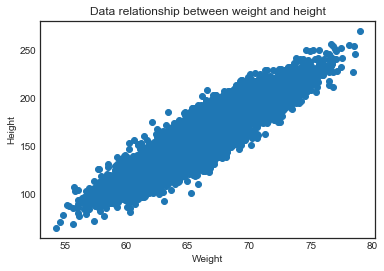

In [13]:
plt.scatter(x=data.Weight , y=data.Height)
plt.title('Data relationship between weight and height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show();

In [14]:
print(min(data.Weight))
print(max(data.Weight))

54.2631333250971
78.99874234638959


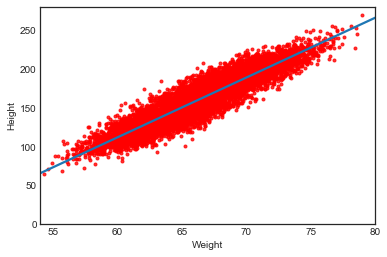

In [15]:
sns.regplot(data.Weight, data.Height, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(54,80)
plt.ylim(ymin=0);

From the above graph we can say that probably there is some linear relationship between Height and Weight.

## There are two main ways to perform linear regression in Python — with Statsmodels and scikit-learn

### Linear Regression in Statsmodels
Statsmodels is "a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration." (from the documentation)

In [16]:
est = smf.ols('Height ~ Weight', data).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-350.7372,2.111,-166.109,0.000,-354.876,-346.598
Weight,7.7173,0.032,242.975,0.000,7.655,7.780


### Interpreting the Table 
First we have what’s the dependent variable and the model and the method. OLS stands for Ordinary Least Squares and the method “Least Squares” means that we’re trying to fit a regression line that would minimize the square of distance from the regression line.

The coefficient of 7.7173 means that as the Weight variable increases by 1, the predicted value of Height increases by 7.7173. A few other important values are the standard error (is the standard deviation of the sampling distribution of a statistic, most commonly of the mean); the t scores and p-values, for hypothesis test — the Weight has statistically significant p-value; there is a 95% confidence intervals for the Weight (meaning we predict at a 95% percent confidence that the value of Weight is between 7.655 to 7.780).

Other important terms on linear regression models are **R-squared** and **F-statistic**

In [17]:
est.summary().tables[0]

Dep. Variable:,Height,R-squared:,0.855
Model:,OLS,Adj. R-squared:,0.855
Method:,Least Squares,F-statistic:,5.904e+04
Date:,"Mon, 25 Mar 2019",Prob (F-statistic):,0.00
Time:,23:13:05,Log-Likelihood:,-39219.
No. Observations:,10000,AIC:,7.844e+04
Df Residuals:,9998,BIC:,7.846e+04
Df Model:,1,,
Covariance Type:,nonrobust,,


The hypotheses for the F-test of the overall significance are as follows:

    Null hypothesis: The fit of the intercept-only model and your model are equal.
    Alternative hypothesis: The fit of the intercept-only model is significantly reduced compared to your model.
If the P value for the F-test of overall significance test is less than your significance level, you can reject the null-hypothesis and conclude that your model provides a better fit than the intercept-only model. In our case p value << 0.005 so we can reject null hypothesis.

R-squared value — 0.855, meaning that this model explains 85.5% of the variance in our dependent variable.

**Now let’s try fitting a regression model with more than one variable — Weight and Gender. Model fitting is the same:**

In [18]:
est = smf.ols('Height ~ Weight + Gender_Categorical', data).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 4.640e+04
Date:                Mon, 25 Mar 2019   Prob (F-statistic):               0.00
Time:                        23:13:09   Log-Likelihood:                -37228.
No. Observations:               10000   AIC:                         7.446e+04
Df Residuals:                    9997   BIC:                         7.448e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -244.9235      2.299   -106.552      0.000    -249.429    -240.418
Weight                 5.9769      0.036    165.973      0.000       5.906       6.048
Gender_Categorical    19.3777      0.277     69.931      0.000      18.835      19.921
==============================================================================
Omnibus:                        0.464   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.793   Jarque-Bera (JB):                0.447
Skew:                           0.016   Prob(JB):                        0.800
Kurtosis:                       3.011   Cond. No.                     1.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpreting the Output 
We can see here that this model has a much higher R-squared value — 0.903, meaning that this model explains 90.3% of the variance in our dependent variable. Whenever we add variables to a regression model, R² will be higher, but this is a pretty high R². We can see that both Weigh and Gender are statistically significant in predicting the person height value; not surprisingly.

Let us use **interruption** term in our model and see is there an synergy between predictors Weight and Gender

In [19]:
est = smf.ols('Height ~ Weight + Gender_Categorical + Weight*Gender_Categorical', data).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-246.0133,3.350,-73.443,0.000,-252.579,-239.447
Weight,5.9940,0.053,114.103,0.000,5.891,6.097
Gender_Categorical,21.5144,4.785,4.496,0.000,12.134,30.895
Weight:Gender_Categorical,-0.0323,0.072,-0.447,0.655,-0.174,0.109


### Interpreting the Output 
As we can see there is no synergy between predictors because p-value for Weight*gender is equal to 0.655, which means that this predictor is not statistically significant.

### Linear Regression in SKLearn
SKLearn is pretty much the golden standard when it comes to machine learning in Python.

In [20]:
from sklearn import linear_model

In [21]:
lm = linear_model.LinearRegression()
X = data[['Weight', 'Gender_Categorical']]
# X = data[['Weight']]
y = data['Height']
model = lm.fit(X,y)

The lm.fit() function fits a linear model. We want to use the model to make predictions, so we’ll use lm.predict():

In [22]:
predictions = lm.predict(X)
print(predictions[0:5])

[215.83348857 185.55960603 217.40595232 203.18605014 192.13359476]


In [23]:
lm.score(X,y)

0.9027481729220092

This is the R² score of our model, as i sad above this is the percentage of explained variance of the predictions. Next, let’s check out the coefficients and intercept:

In [24]:
print(lm.coef_)
print(lm.intercept_)

[ 5.97694123 19.37771052]
-244.92350252069988


In [25]:
# Create a coordinate grid
Weight = np.arange(54,80)
Gender_Categorical = np.arange(0, 2)

B1, B2 = np.meshgrid(Weight, Gender_Categorical, indexing='xy')
Z = np.zeros((Gender_Categorical.size, Weight.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(lm.intercept_ + B1[i,j]*lm.coef_[0] + B2[i,j]*lm.coef_[1])

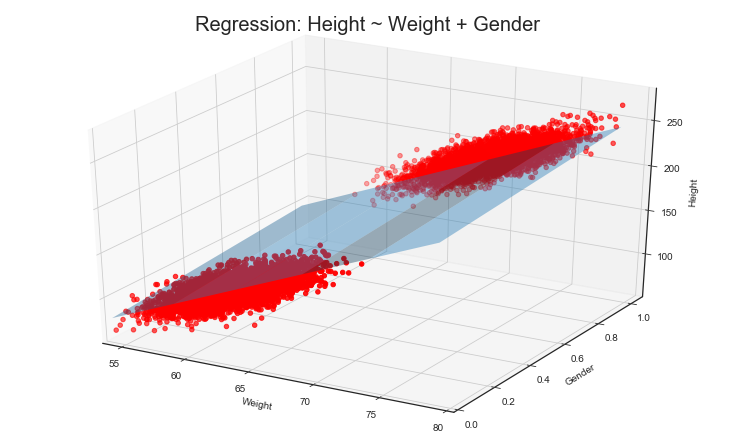

In [26]:
# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Height ~ Weight + Gender', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(data.Weight, data.Gender_Categorical, data.Height, c='r')

ax.set_xlabel('Weight')
ax.set_xlim(54,80)
ax.set_ylabel('Gender')
ax.set_ylim(ymin=0)
ax.set_zlabel('Height');

In [27]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score

In [28]:
scores = cross_val_score(lm, X, y, cv=6)
print ("Cross-validated scores:", scores.mean())

Cross-validated scores: 0.7328066585863953


In [29]:
lm2 = linear_model.LinearRegression()
X = data[['Weight']]
y = data['Height']
print ("Cross-validated scores:", cross_val_score(lm, X, y, cv=6).mean())

Cross-validated scores: 0.5715266817745311


# Linear Regression 

### Implement "loss" function
 

### Implement "fit" function gradient descent 

### Implement "predict" function 

### Depict the plot of loss over iterations
 

### Choose the "learning rate" value, show the comparison to other values via loss plot
 

### Plot the regression line you have found
 

In [30]:
class LinearRegressionUsingGD:
    """Linear Regression Using Gradient Descent.

    Parameters
    ----------
    eta : float
        Learning rate
    n_iterations : int
        No of passes over the training set

    Attributes
    ----------
    w_ : weights/ after fitting the model
    cost_ : total error of the model after each iteration

    """

    def __init__(self, eta=0.05, n_iterations=1000):
        self.eta = eta
        self.n_iterations = n_iterations

    def fit(self, x, y):
        """Fit the training data

        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values

        Returns
        -------
        self : object

        """

        self.cost_ = []
        self.w_ = np.zeros((x.shape[1], 1))
        m = x.shape[0]
        
        # https://stackoverflow.com/questions/20735406/vectorization-of-a-gradient-descent-code
        for _ in range(self.n_iterations):
            y_pred = np.dot(x, self.w_)
            residuals = y_pred - y
            gradient_vector = np.dot(x.T, residuals)
            self.w_ -= (self.eta / m) * gradient_vector
            cost = np.sum((residuals ** 2)) / (2 * m)
            self.cost_.append(cost)
        return self

    def predict(self, x):
        """ Predicts the value after the model has been trained.

        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples

        Returns
        -------
        Predicted value

        """
        return np.dot(x, self.w_)

In [31]:
class PerformanceMetrics:
    """Defines methods to evaluate the model

    Parameters
    ----------
    y_actual : array-like, shape = [n_samples]
            Observed values from the training samples
    y_predicted : array-like, shape = [n_samples]
            Predicted values from the model

    """

    def __init__(self, y_actual, y_predicted):
        self.y_actual = y_actual
        self.y_predicted = y_predicted
        self.lenght = len(y_actual)

    def compute_rmse(self):
        """Compute the root mean squared error

        Returns
        ------
        rmse : root mean squared error

        """
        return np.sqrt(np.sum((self.y_actual - self.y_predicted) ** 2) / 2*self.lenght)

    def compute_r2_score(self):
        """Compute the r-squared score


            Returns
            ------
            r2_score : r-squared score

            """
        # sum of square of residuals
        ssr = self.sum_of_square_of_residuals()

        # total sum of errors
        sst = np.sum((self.y_actual - np.mean(self.y_actual)) ** 2)

        return 1 - (ssr / sst)

    def sum_of_square_of_residuals(self):
        return np.sum((self.y_actual - self.y_predicted) ** 2)


In [32]:
import matplotlib.pyplot as plt

def scatter_plot(x, y, size=10, x_label='x', y_label='y', color='b'):
    plt.scatter(x, y, s=size, color=color)
    set_labels(x_label, y_label)


def plot(x, y, x_label='x', y_label='y', color='r'):
    plt.plot(x, y, color=color)
    set_labels(x_label, y_label)


def ploty(y, x_label='x', y_label='y'):
    plt.plot(y)
    set_labels(x_label, y_label)


def set_labels(x_label, y_label):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


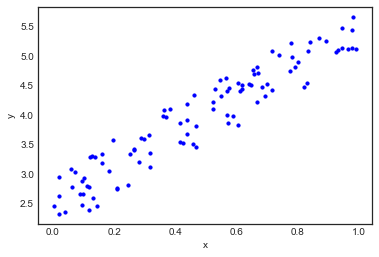

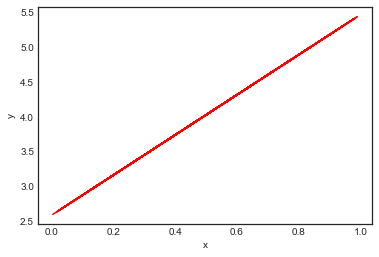

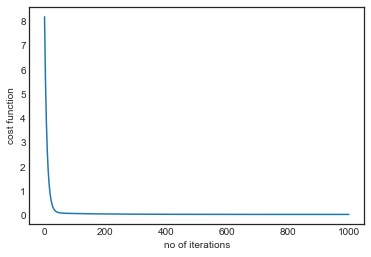

The coefficient is [2.89114079]
The intercept is [2.58109277]
Root mean squared error of the model is 19.545718641877727.
R-squared score is 0.9036464134445802.


In [33]:
linear_regression_model = LinearRegressionUsingGD()

# data = pd.read_csv('HW_gender.csv')
# x = np.array(data["Weight"])
# y = np.array(data["Height"])
# x = np.array([[elem] for elem in x])
# y = np.array([[elem] for elem in y])

np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

# transform the feature vectors to include the bias term
# adding 1 to all the instances of the training set.
m = x.shape[0]
x_train = np.c_[np.ones((m, 1)), x]

# fit/train the model
linear_regression_model.fit(x_train, y)

# predict values
predicted_values = linear_regression_model.predict(x_train)

# model parameters
# print(linear_regression_model.w_)
intercept, coeffs = linear_regression_model.w_

# cost_function
cost_function = linear_regression_model.cost_

# plotting
scatter_plot(x, y)
plot(x, predicted_values)
ploty(cost_function, 'no of iterations', 'cost function')
# print(cost_function)

# computing metrics
metrics = PerformanceMetrics(y, predicted_values)
rmse = metrics.compute_rmse()
r2_score = metrics.compute_r2_score()

print('The coefficient is {}'.format(coeffs))
print('The intercept is {}'.format(intercept))
print('Root mean squared error of the model is {}.'.format(rmse))
print('R-squared score is {}.'.format(r2_score))